In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

winners_df = pd.read_csv("./winners.csv")
losers_df = pd.read_csv("./losers.csv")


In [3]:
total_matches_df = pd.concat([winners_df, losers_df])

In [4]:
total_matches_df.head()

,Unnamed: 0,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,0,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4.247263e+09
1,1,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4.247156e+09
2,2,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4.243963e+09
3,3,200,Win,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion...",4.241678e+09
4,4,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion...",4.241539e+09


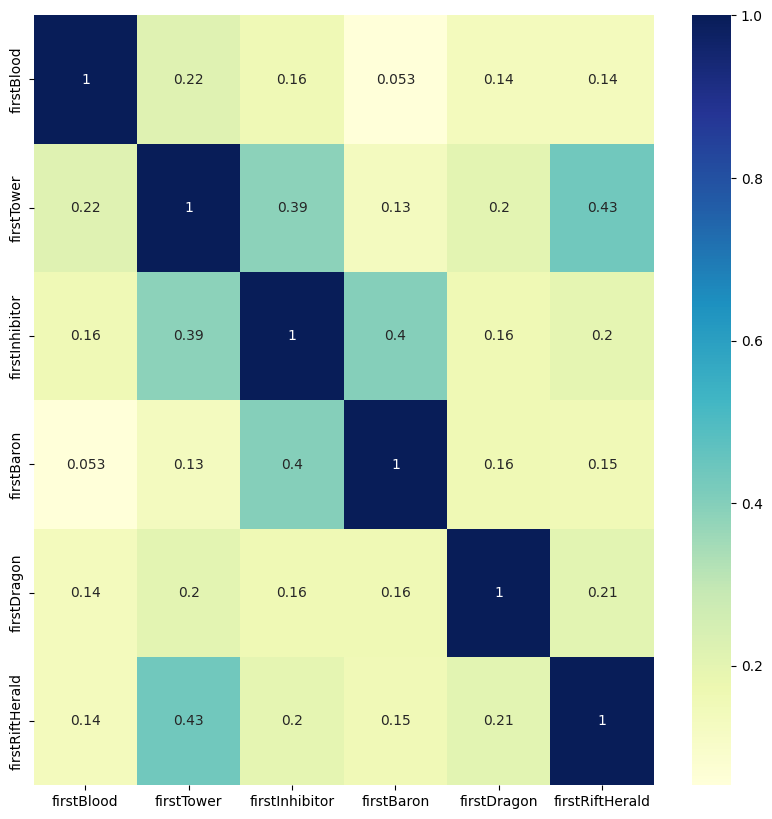

In [57]:
import seaborn as sns

total_matches_df = total_matches_df[["win", "firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald"]]
total_matches_df.dropna(inplace = True)
plt.figure(figsize = (10, 10))
sns.heatmap(total_matches_df.corr(numeric_only = True), cmap = "YlGnBu", annot = True)
plt.show()

In [6]:
total_matches_df.groupby('win').mean()

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
win,,,,,,
Fail,0.395554,0.262477,0.066525,0.080713,0.298942,0.274957
Win,0.602321,0.725239,0.694962,0.394224,0.559704,0.518823


Histograms here to show the win/fail chances based on each condition

(e.g. graph of firstBlood and win chances)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay


y = total_matches_df["win"]
x = total_matches_df.drop(["win"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify=y)


dc = DecisionTreeClassifier().fit(x_train, y_train)
pred = dc.predict(x_test)


print(recall_score(y_true = y_test, y_pred = pred, pos_label = "Win"))
print(balanced_accuracy_score(y_true = y_test, y_pred = pred))
fn = ["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald"]
print(dc.feature_importances_)

0.8509602131765138
0.8413024697191871
[0.00810117 0.13326591 0.78040934 0.03996116 0.03621114 0.00205127]


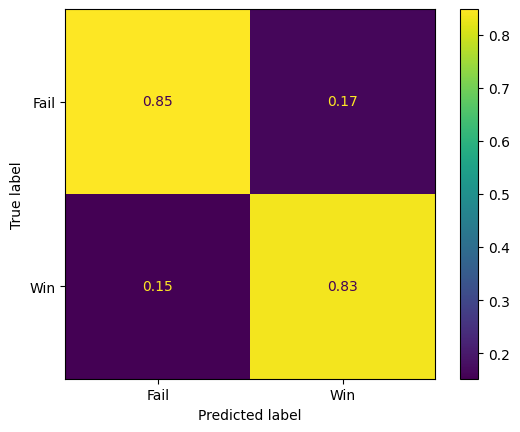

In [51]:
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, pred, normalize = "pred")

disp = ConfusionMatrixDisplay(cfm, display_labels = dc.classes_)

disp.plot()

plt.show()


In [28]:
from sklearn.neighbors import KNeighborsClassifier

y = total_matches_df["win"]
x = total_matches_df.drop(["win"], axis = 1)
indices = []
recalls = []
accuracies = []
for i in range(5, 201, 5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify=y)

    knn = KNeighborsClassifier(n_neighbors = i, weights = "uniform").fit(x_train, y_train)
    pred = knn.predict(x_test)
    indices.append(i)
    recalls.append(recall_score(y_true = y_test, y_pred = pred, pos_label = "Win"))
    accuracies.append(balanced_accuracy_score(y_true = y_test, y_pred = pred))

In [34]:
print(recalls)
print(accuracies)

[0.8409216208765965, 0.817283837177249, 0.8174676100339979, 0.8462510337223192, 0.8111044748690618, 0.8325599558945144, 0.8586786731599743, 0.8149637048607921, 0.8282183221538179, 0.8138380961132041, 0.8364421574933383, 0.8294817605439676, 0.820591748598732, 0.8199715152072039, 0.8564274556647983, 0.8442295322980796, 0.8186391619957732, 0.8330653312505742, 0.8526601121014427, 0.8359138105301847, 0.8215795277037582, 0.8494440871083341, 0.8286547826885969, 0.8586786731599743, 0.8534411467426262, 0.8391987503445741, 0.812528714508867, 0.840829734448222, 0.8222227327023799, 0.8510291279977947, 0.8442525039051733, 0.8378204539189562, 0.8198336855646421, 0.8337085362491959, 0.8427823210511808, 0.8430350087292107, 0.8186621336028669, 0.8250022971607094, 0.8565882569144537, 0.8302627951851511]
[0.81820244206924, 0.841442249417765, 0.8324937700961452, 0.8401655150232199, 0.8378471348545231, 0.8400399430264034, 0.8386714752525353, 0.8392828035641751, 0.841671363847603, 0.8402133251719557, 0.8422

<AxesSubplot: >

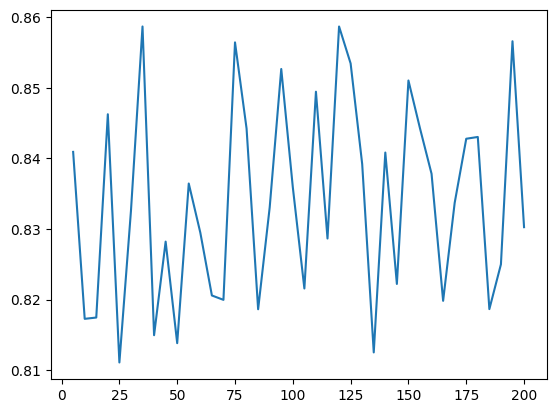

In [35]:
sns.lineplot(x = indices, y = recalls)

<AxesSubplot: >

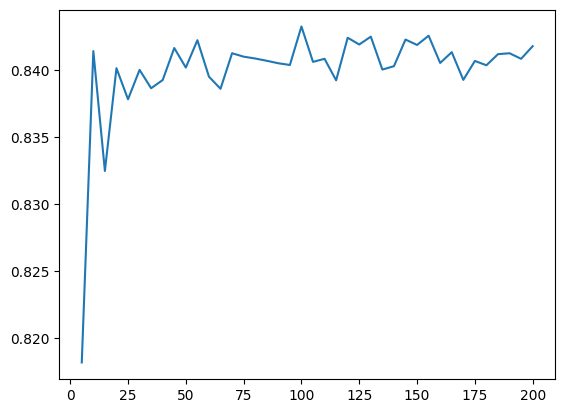

In [36]:
sns.lineplot(x = indices, y = accuracies)

In [9]:
matches_df = matches_df[["gameId", "participants"]]
team_champs_df = pd.DataFrame(columns = ["Blue_1", "Blue_2", "Blue_3", "Blue_4", "Blue_5", "Red_1", "Red_2", "Red_3", "Red_4", "Red_5", "Win", "gameId"])

for index, match in matches_df.iterrows():
    try:
        players = match["participants"]
        print(players)
        win = players[0]["teamId"] if players[0]["stats"]["win"] == True else players[5]["teamId"]
        blue_team_champs = [players[i]["championId"] for i in range(5)]
        red_team_champs = [players[i + 5]["championId"] for i in range(5)]
        champs = blue_team_champs + red_team_champs
        champs.append("Blue" if win == 100 else "Red")
        champs.append(match["gameId"])
        team_champs_df.loc[len(team_champs_df)] = champs
        break
    except:
        continue

len(team_champs_df)

NameError: name 'matches_df' is not defined

In [ ]:
df = pd.merge(matches_df, team_champs_df, on = "gameId", how = "left").drop(["participants"], axis = 1)
df.dropna(axis = 0, how = "any", inplace = True)

In [ ]:
df.head()

In [ ]:
y = df["Win"]
x = df.drop(["Win", "gameId"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify=y)


dc = DecisionTreeClassifier().fit(x_train, y_train)
pred = dc.predict(x_test)


print(recall_score(y_true = y_test, y_pred = pred, average = "micro"))
print(balanced_accuracy_score(y_true = y_test, y_pred = pred))
fn = ["Blue_1", "Blue_2", "Blue_3", "Blue_4", "Blue_5", "Red_1", "Red_2", "Red_3", "Red_4", "Red_5"]
print(dc.feature_importances_)